# Random Over-sampling

Random over-sampling consists in extracting at random samples from the minority class, until they reach a certain proportion compared to the majority class, typically 50:50, or in other words, a balancing ratio of 1.

In Random over-sampling, we extract samples from the minority class at random, with replacement.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import RandomOverSampler

In [60]:
import warnings
warnings.simplefilter('ignore')

## Create data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [4]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
X.head()

,VarA,VarB
0,0.882246,-0.053265
1,0.149755,-0.283684
2,2.020178,-0.670297
5,-2.504095,-0.771262
7,-1.063080,1.391957


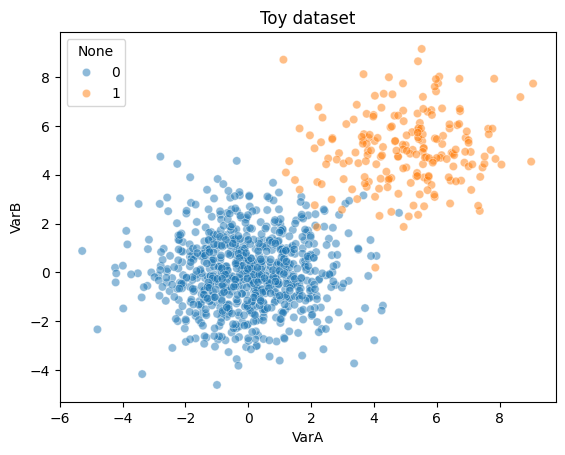

In [6]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Random Over-sampling

[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)


Selects samples from the minority class at random, with replacement, until we have as many observations as those in the majority class (or any other balancing ratio we wish).

In [7]:
ros = RandomOverSampler(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
)  

X_res, y_res = ros.fit_resample(X, y)

In [8]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# size of undersampled data

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [10]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

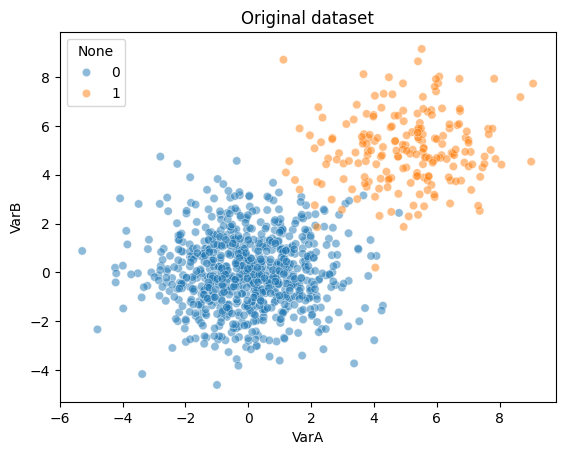

In [11]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

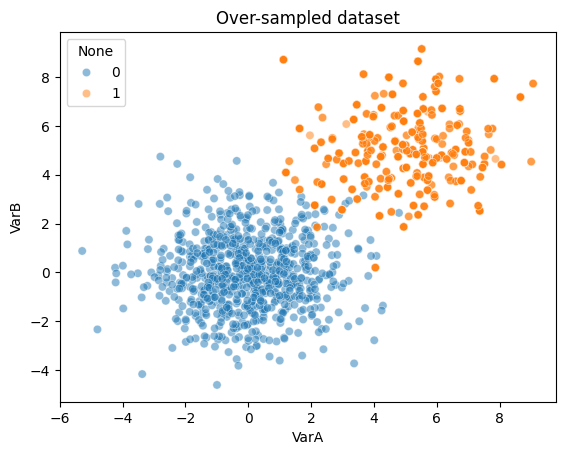

In [12]:
# plot of resampled data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

The reason why we do not see as if there were more observations from the minority, is because they are identical to the other ones, so they are plotted on top. We notice there are more, because the orange colour is darker.

# SMOTE

Creates new samples by interpolation of samples of the minority class and any of its k nearest neighbours (also from the minority class). K is typically 5.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

## Create data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [14]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

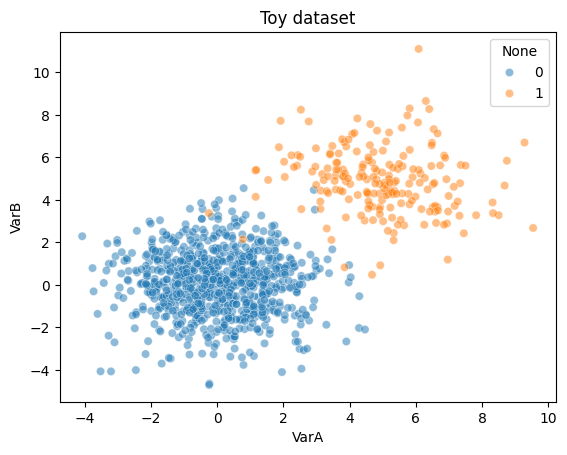

In [15]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## SMOTE

[SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [61]:
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    n_jobs=4
)

X_res, y_res = sm.fit_resample(X, y)

In [17]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [18]:
# size of undersampled data

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [19]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

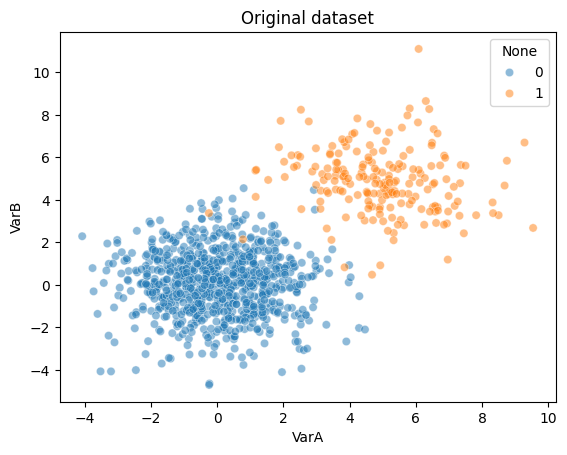

In [20]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

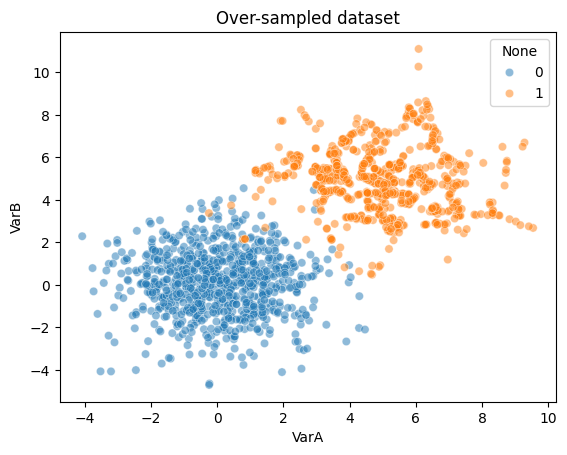

In [21]:
# plot of original data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

There are now new observations that differ from the original ones. 

# Random Undersampling

Random undersampling consists in extracting at random samples from the majority class, until they reach a certain proportion compared to the minority class, typically 50:50.

- **Criteria for data exclusion**: Random
- **Final Dataset size**: 2 x minority class

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

## Create data

We will create data where the classes have different degrees of separateness.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [23]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

In [25]:
# make datasets with different class separateness
# and plot

for sep in [0, 1, 2]:
    
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )
    
    plt.title('Separation: {}'.format(sep))
    plt.show()

InvalidParameterError: The 'class_sep' parameter of make_classification must be a float in the range (0.0, inf). Got 0 instead.

As we increase the parameter **sep**, the minority and majority class show less degree of overlap.

## Random Undersampling

[RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

Selects samples from the majority class at random, until we have as many observations as those in the minority class.

In [26]:
# create data

X, y = make_data(sep=2)

# set up the random undersampling class

rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only the majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

In [27]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [28]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((34, 2), (34,))

In [29]:
# number of minority class observations

y.value_counts()

0    983
1     17
Name: count, dtype: int64

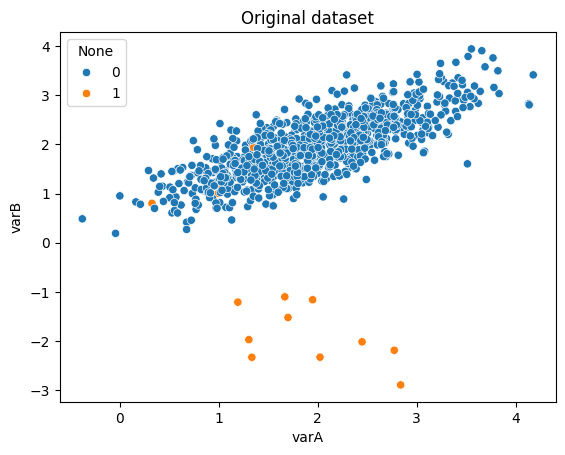

In [30]:
# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

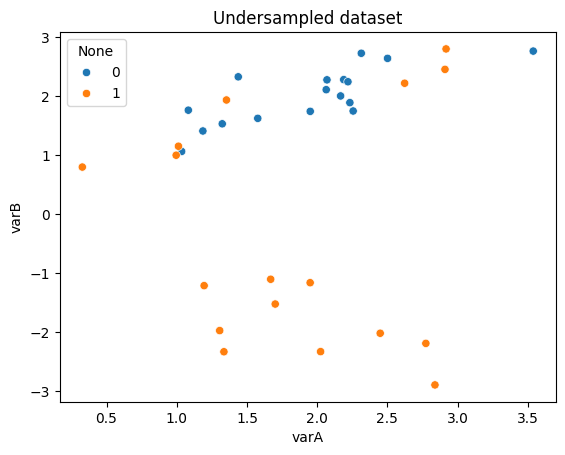

In [31]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

The samples show a similar observation as they do in the original dataset. This is the product of removing data at random.


## Changing the balancing ratio

In [32]:
# now, I will resample the data, so that I obtain
# twice as many observations from the majority as
# those from the minority

rus = RandomUnderSampler(
    sampling_strategy= 0.5,  # remember balancing ratio = x min / x maj
    random_state=0,  
    replacement=False # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

In [33]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((51, 2), (51,))

In [34]:
# see that we have twice as many of the majority now

y_resampled.value_counts()

0    34
1    17
Name: count, dtype: int64

In [35]:
# and we can also specify how many observations we want
# from each class

rus = RandomUnderSampler(
    sampling_strategy= {0:100, 1:15},  # remember balancing ratio = x min / x maj
    random_state=0,  
    replacement=False # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

In [36]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((115, 2), (115,))

In [37]:
# we have what we asked for :)

y_resampled.value_counts()

0    100
1     15
Name: count, dtype: int64

# Tomek Links


Tomek links are 2 samples from a different class, which are nearest neighbours to each other. In other words, if 2 observations are nearest neighbours, and from a different class, they are Tomek Links.

This procedures removes either the sample from the majority class if it is a Tomek Link, or alternatively, both observations, the one from the majority and the one from the minority class.

====

- **Criteria for data exclusion**: Samples are Tomek Links
- **Final Dataset size**: varies

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import TomekLinks

## Create data

We will create data where the classes have different degrees of separateness.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [39]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Undersample with Tomek Links

[TomekLinks](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

### Well separated classes

In [40]:
# create data

X, y = make_data(sep=2)

# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X, y)

In [41]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [42]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((994, 2), (994,))

In [43]:
# number of minority class observations

y.value_counts()

0    983
1     17
Name: count, dtype: int64

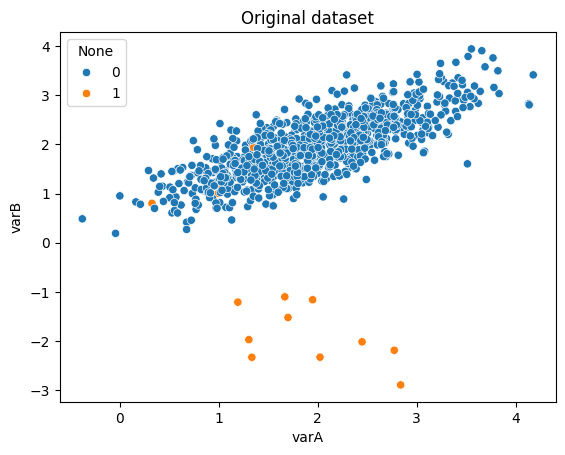

In [44]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

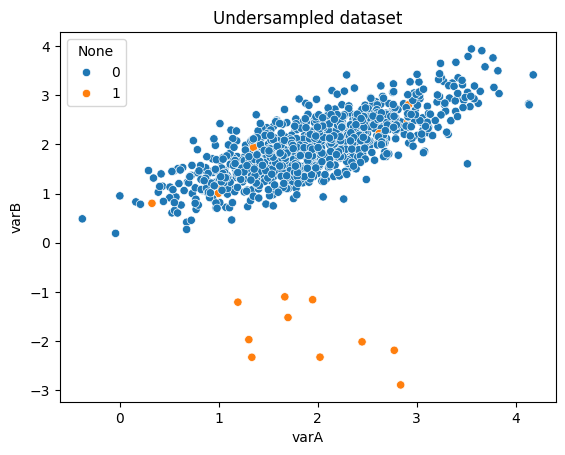

In [45]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

### Partially separated classes

In [46]:
# create data
X, y = make_data(sep=0.5)

# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X, y)

In [47]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [48]:
# undersampled data

X_resampled.shape, y_resampled.shape

((988, 2), (988,))

Note that more samples were excluded in the final training set, compared to the previous case where classes were more separated. This is because there are more Tomek Links, as the classes are now not so separated.

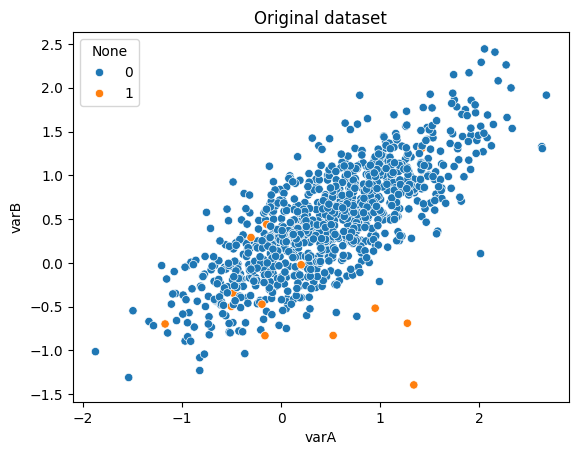

In [49]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

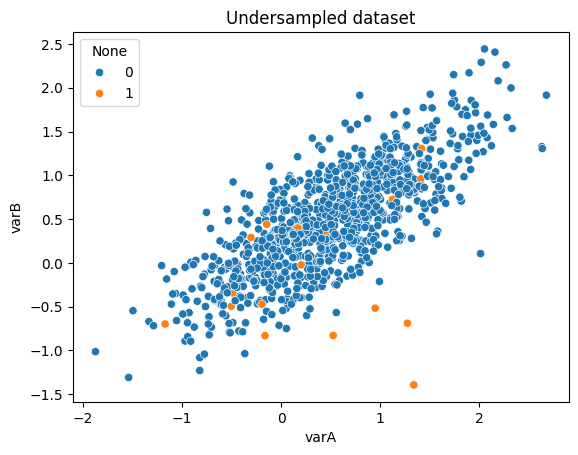

In [50]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

## Ensemble Learning

In this notebook, we will compare the performance of:

- just re-sampling
- just boosting or bagging
- bagging + resamppling
- boosting + resampling
- bagging + boosting + resampling

Utilizing classes from sklearn and imbalanced learn, over various datasets.

In [51]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)

from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.datasets import fetch_datasets

from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

from imblearn.ensemble import (
    BalancedBaggingClassifier,
    BalancedRandomForestClassifier,
    RUSBoostClassifier,
    EasyEnsembleClassifier,
)

In [52]:
! pip install imbalanced-learn==0.10.1

  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [53]:
# just re-sampling methods (no classifier)

resampling_dict = {
    
    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0
    ),

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        n_jobs=4,
    ),
}

In [54]:
# ensemble methods (with or without resampling)

ensemble_dict = {

    # balanced random forests (bagging)
    'balancedRF': BalancedRandomForestClassifier(
        n_estimators=20,
        criterion='gini',
        max_depth=3,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),

    # bagging of Logistic regression, no resampling
    'bagging': BaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        n_jobs=4,
        random_state=2909,
    ),

    # bagging of Logistic regression, with resampling
    'balancedbagging': BalancedBaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        max_samples=1.0,  # The number of samples to draw from X to train each base estimator
        max_features=1.0,  # The number of features to draw from X to train each base estimator
        bootstrap=True,
        bootstrap_features=False,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),


    # bagging + boosting + under-sammpling
    'easyEnsemble': EasyEnsembleClassifier(
        n_estimators=20,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),
}

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [55]:
datasets_ls = [
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

In [56]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(
        n_estimators=20, random_state=39, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
    pred = rf.predict(X_train)
    print(
        'Random Forests metrics: ',(classification_report(y_train, pred)))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    
    pred_ = rf.predict(X_test)
    print(
        'Random Forests metrics: ',(classification_report(y_test, pred_)))

    return roc_auc_score(y_test, pred[:, 1])

In [57]:
# function to train random forests and evaluate the peadaormance

def run_adaboost(X_train, X_test, y_train, y_test):

    ada = AdaBoostClassifier(n_estimators=20, random_state=2909)
    
    ada.fit(X_train, y_train)

    print('Train set')
    pred = ada.predict_proba(X_train)
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
    
    pred = ada.predict(X_train)
    print(
        'AdaBoost metrics: ', (classification_report(y_train, pred)))    

    print('Test set')
    pred = ada.predict_proba(X_test)
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    pred_ = ada.predict(X_test)
    print(
        'AdaBoost metrics: ',(classification_report(y_test, pred_)))    


    return roc_auc_score(y_test, pred[:, 1])

In [58]:
# function to train random forests and evaluate the peensembleormance

def run_ensemble(ensemble, X_train, X_test, y_train, y_test):
    
    ensemble.fit(X_train, y_train)

    print('Train set')
    pred = ensemble.predict_proba(X_train)
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
    
    pred = ensemble.predict(X_train)
    print(
        'ensembleBoost metrics: ', (classification_report(y_train, pred)))    


    print('Test set')
    pred = ensemble.predict_proba(X_test)
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    
    pred_ = ensemble.predict(X_test)
    print(
        'ensembleBoost metrics:' ,(classification_report(y_test, pred_)))    


    return roc_auc_score(y_test, pred[:, 1])

In [59]:
# to save the results
results_dict = {}

for dataset in datasets_ls:
    
    results_dict[dataset] = {}    
    print(dataset)
    
    # load dataset
    data = fetch_datasets()[dataset]
    
    # separate train and test
    X_train, X_test, y_train, y_test = train_test_split(
    data.data,  
    data.target, 
    test_size=0.3,
    random_state=0)
    
    # we set variables in the same scale
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # train model and store result
    roc = run_randomForests(X_train, X_test, y_train, y_test)
    results_dict[dataset]['full_data'] = roc
    print()
    
    # train model and store result
    roc = run_adaboost(X_train, X_test, y_train, y_test)
    results_dict[dataset]['full_data_adaboost'] = roc
    print()
    
    for sampler in resampling_dict.keys():
        
        print(sampler)
        
        # resample
        X_resampled, y_resampled = resampling_dict[sampler].fit_resample(X_train, y_train)
        
        # train model and store result
        roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)
        results_dict[dataset][sampler] = roc
        print()
    
    for ensemble in ensemble_dict.keys():
        
        print(ensemble)
        
        # train model and store result
        roc = run_ensemble(ensemble_dict[ensemble], X_train, X_test, y_train, y_test)
        results_dict[dataset][ensemble] = roc
        print()
        

thyroid_sick
Train set
Random Forests roc-auc: 0.9659770036881864
Random Forests metrics:                precision    recall  f1-score   support

          -1       0.94      1.00      0.97      2486
           1       0.00      0.00      0.00       154

    accuracy                           0.94      2640
   macro avg       0.47      0.50      0.48      2640
weighted avg       0.89      0.94      0.91      2640

Test set
Random Forests roc-auc: 0.9488890256662768
Random Forests metrics:                precision    recall  f1-score   support

          -1       0.93      1.00      0.96      1055
           1       0.00      0.00      0.00        77

    accuracy                           0.93      1132
   macro avg       0.47      0.50      0.48      1132
weighted avg       0.87      0.93      0.90      1132




C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Train set
AdaBoost roc-auc: 0.9909388680506942
AdaBoost metrics:                precision    recall  f1-score   support

          -1       0.98      0.99      0.98      2486
           1       0.82      0.64      0.72       154

    accuracy                           0.97      2640
   macro avg       0.90      0.82      0.85      2640
weighted avg       0.97      0.97      0.97      2640

Test set
AdaBoost roc-auc: 0.9634086292854065
AdaBoost metrics:                precision    recall  f1-score   support

          -1       0.98      0.99      0.98      1055
           1       0.83      0.74      0.78        77

    accuracy                           0.97      1132
   macro avg       0.90      0.86      0.88      1132
weighted avg       0.97      0.97      0.97      1132


random
Train set
Random Forests roc-auc: 0.9752698600101198
Random Forests metrics:                precision    recall  f1-score   support

          -1       0.92      0.99      0.95       154
           1       0

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.958279397611338
Random Forests metrics:                precision    recall  f1-score   support

          -1       0.88      0.87      0.87      2486
           1       0.87      0.88      0.88      2486

    accuracy                           0.88      4972
   macro avg       0.88      0.88      0.88      4972
weighted avg       0.88      0.88      0.88      4972

Test set
Random Forests roc-auc: 0.9439896596294699
Random Forests metrics:                precision    recall  f1-score   support

          -1       0.99      0.86      0.92      1055
           1       0.30      0.83      0.44        77

    accuracy                           0.86      1132
   macro avg       0.64      0.84      0.68      1132
weighted avg       0.94      0.86      0.88      1132




NameError: name 'ensemble_dict' is not defined

In [ ]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

In [ ]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.ylim(0.8, 1)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

We see that boosting algorithms tend to outperform bagging algorithms. And adding resampling to bagging improves performance, in general, quite a bit.

Note that here, I am comparing the vanilla models for each ensemble. If we put some time into optimising the parameters, surely, we could get better models for each one of these implementations. I leave that as a homework to you.
